# 4

In [1]:
from numpy.random import normal
import matplotlib.pyplot as plt
import random

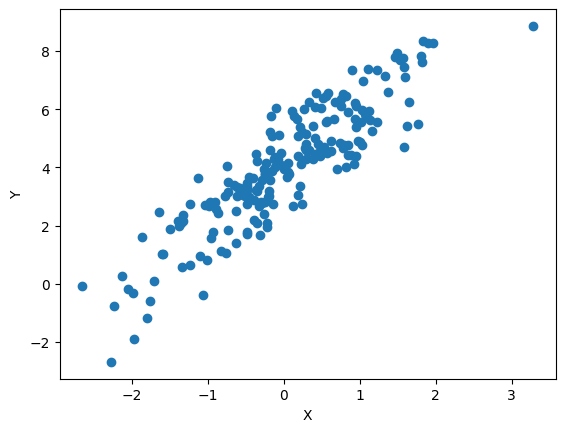

In [2]:
a = 4
b = 2

N = 200
X = normal(loc=0.0, scale=1.0,size=N)
W = normal(loc=0.0, scale=1.0,size=N)
Y = a+b*X+W

plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [3]:
def mean_square_error(X,Y,w1,w2):
    n=len(X)
    total_error=0

    for i in range(n):
        total_error = total_error+(w1+w2*X[i]-Y[i])**2

    mse = total_error/n
    return mse

In [4]:
def gradient_mean_square_error(X,Y,w1,w2):
    n=len(X)
    partial_deriative_w1=0
    partial_deriative_w2=0

    for i in range(n):
        partial_deriative_w1+=2*(w1+w2*X[i]-Y[i])
        partial_deriative_w2+=2*(w1+w2*X[i]-Y[i]*X[i])

    partial_deriative_w1 = partial_deriative_w1/n
    partial_deriative_w2 = partial_deriative_w2/n

    return partial_deriative_w1, partial_deriative_w2

In [5]:
def gradien_descent(X,Y,w1,w2, learning_rate, num_iterations):
    mse_list=[]
    for i in range(num_iterations):
        partial_deriative_w1, partial_deriative_w2=gradient_mean_square_error(X,Y,w1,w2)
        w1-=learning_rate*partial_deriative_w1
        w2-=learning_rate*partial_deriative_w2

        mse_list.append(mean_square_error(X,Y,w1,w2))

    return w1,w2,mse_list

In [6]:
initial_w1=random.uniform(0,1)
initial_w2=random.uniform(0,1)

learning_rate=0.1
iterations=1000

final_w1, final_w2,mse_final_list=gradien_descent(X,Y,initial_w1,initial_w2, learning_rate, iterations)

print("Orginal value a= ", a, " New calculated value w1= ", final_w1)
print("Orginal value a= ", b, " New calculated value w1= ", final_w2)

Orginal value a=  4  New calculated value w1=  12.352240334539726
Orginal value a=  2  New calculated value w1=  -417.16464840702804


In [7]:
def predict(Y,X,w1,w2):
    Y_pred=[]
    for x in X:
        val = w2*x+w1
        Y_pred.append(val)
    return Y_pred

<function matplotlib.pyplot.show(close=None, block=None)>

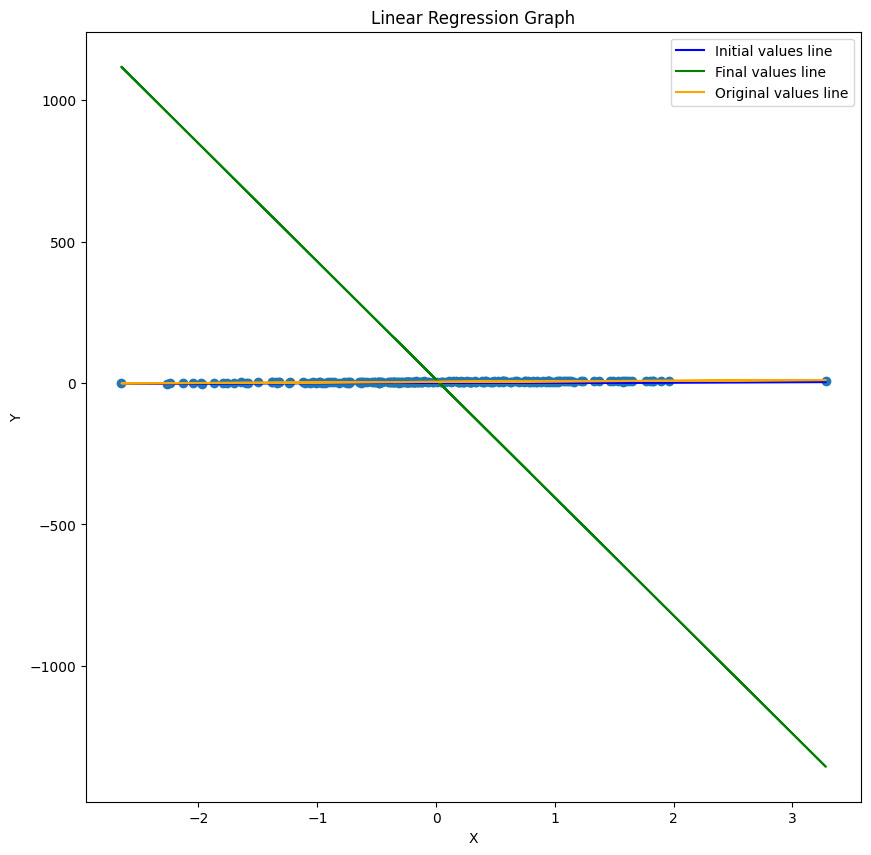

In [8]:
plt.figure(figsize=(10,10))

plt.scatter(X,Y)
plt.xlabel('X')
plt.ylabel('Y')

get_preds = predict(Y,X,initial_w1,initial_w2)
plt.plot(X,get_preds,color='b',label = "Initial values line")

get_preds = predict(Y,X,final_w1,final_w2)
plt.plot(X,get_preds,color='g',label = "Final values line")

get_preds = predict(Y,X,a,b)
plt.plot(X,get_preds,color='orange',label = "Original values line")

plt.title("Linear Regression Graph")
plt.legend()
plt.show